# Thick Radiator Bremsstrahlung Spectrum
Computes the spectrum for a thick radiator assuming a 1/k thin-radiator radiation rate.

In [88]:
import ROOT
dNelec = ROOT.TH2D('dNelec', "electron beam spectrum vs depth inside the radiator", 120, 0, 12, 30, 0, 0.1)
dNelec.GetXaxis().SetTitle("electron energy (GeV)")
dNelec.GetYaxis().SetTitle("depth in radiator (rad.len.)")
dNphot = ROOT.TH2D('dNphot', "photon energy spectrum vs radiation depth in the radiator", 120, 0, 12, 30, 0, 0.1)
dNphot.GetXaxis().SetTitle("photon energy (GeV)")
dNphot.GetYaxis().SetTitle("depth in radiator (rad.len.)")

Warning in <TROOT::Append>: Replacing existing TH1: dNelec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dNphot (Potential memory leak).


1. Initialize the beam at the entry to the radiator

In [89]:
dNelec.Fill(11.99, 0, 1)

242

In [90]:
for iz in range(dNelec.GetNbinsY()):
    dz = dNelec.GetYaxis().GetBinWidth(iz+1)
    for ie in range(dNelec.GetNbinsX()):
        E = dNelec.GetXaxis().GetBinCenter(ie+1)
        dE = dNelec.GetXaxis().GetBinWidth(ie+1)
        dNdE = dNelec.GetBinContent(ie+1, iz+1)
        for ieprime in range(dNelec.GetNbinsX()):
            Eprime = dNelec.GetXaxis().GetBinCenter(ieprime+1)
            if Eprime > E:
                drate = dNelec.GetBinContent(ieprime+1, iz+1) * dz * dE / (Eprime - E)
                dNdE += drate
                dNphot.Fill(Eprime - E + dE/2, z, drate)
            elif Eprime < E:
                drate = dNelec.GetBinContent(ie+1, iz+1) * dz * dE / (E - Eprime)
                dNdE -= drate
                dNphot.Fill(E - Eprime + dE/2, z, drate)
        dNelec.SetBinContent(ie+1, iz+2, dNdE)                                  

0.9999999999999999


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


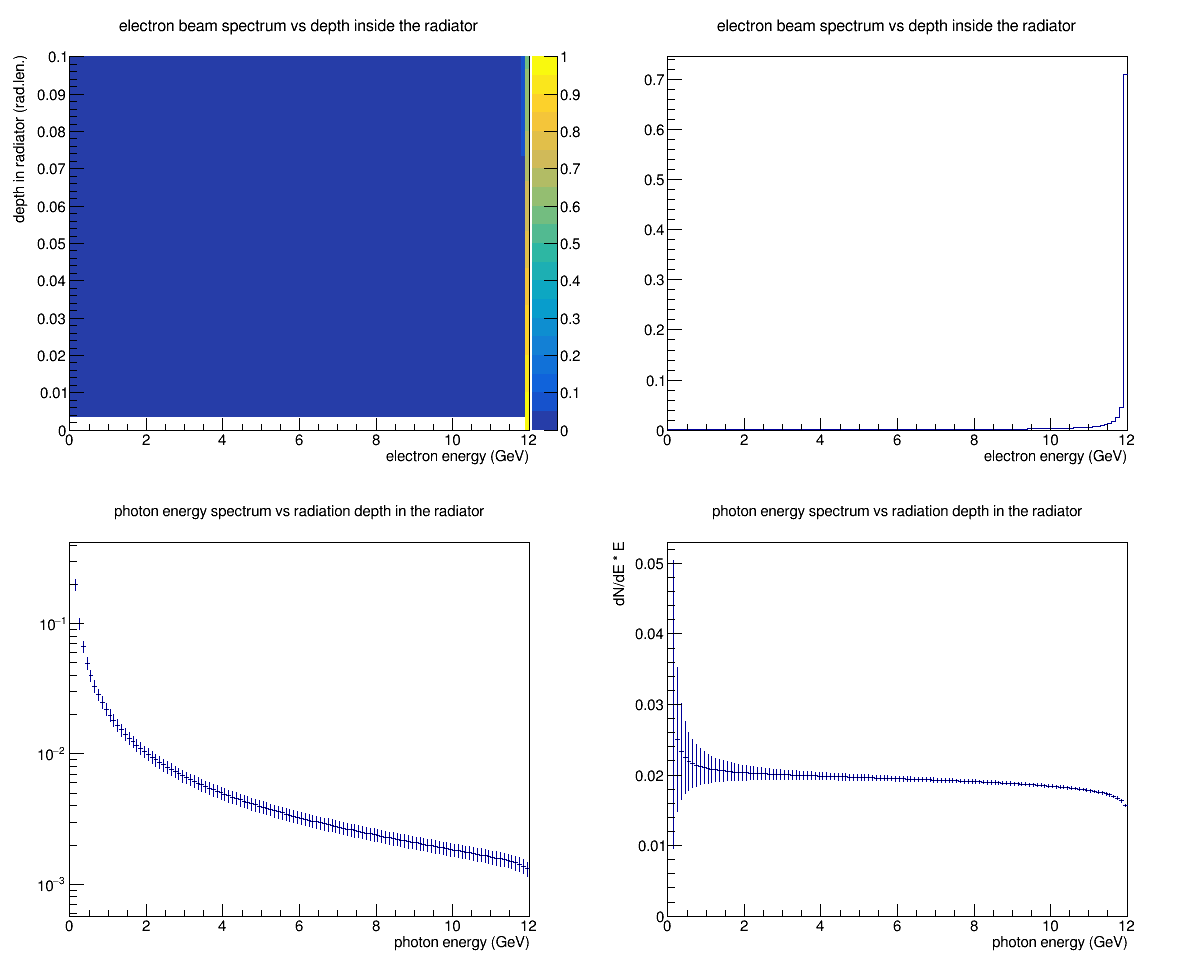

In [91]:
c1 = ROOT.TCanvas('c1', "", 1200, 1000)
pads = []
c1.Divide(2, 2)
pads.append(c1.cd(1))
dNelec.SetStats(0)
dNelec.Draw("colz")
pads.append(c1.cd(2))
dNx = dNelec.ProjectionX('dNx', 20, 20)
print(dNx.Integral())
dNx.SetStats(0)
dNx.Draw()
pads.append(c1.cd(3))
pads[-1].SetLogy(1)
dNpx = dNphot.ProjectionX('dNpx')
dNpx.SetStats(0)
dNpx.Draw()
pads.append(c1.cd(4))
dNpx2 = dNpx.Clone("dNpx2")
for i in range(dNpx2.GetNbinsX()):
    x = dNpx2.GetXaxis().GetBinCenter(i+1)
    dNpx2.SetBinContent(i+1, dNpx2.GetBinContent(i+1) * x)
dNpx2.GetYaxis().SetTitle("dN/dE * E")
dNpx2.Draw()
c1.cd(0)
c1.Draw()